# Predicting Store Purchase Values Using BlackFriday Dataset

In [89]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import logistic_regression_path
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor    
#
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
#
import os
from sklearn.model_selection import cross_val_score

In [111]:
# Method to find Train and Test Error of Models
# Prediction ---> X_train
def calc_train_error_mae(predictions, y_train):
    mae = metrics.mean_absolute_error(y_train,predictions)
    return mae

def calc_train_error_mse(predictions, y_train):
    mse = (metrics.mean_squared_error(y_train,predictions))
    rmse = np.sqrt(mse)
    return mse

def calc_train_error_rmse(predictions, y_train):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, predictions))
    return rmse

#Prediction --> X_test
def calc_validation_error_mae(predictions, y_test):
    mae = metrics.mean_absolute_error(y_test,predictions)
    return mae

def calc_validation_error_mse(predictions, y_test):
    mse = (metrics.mean_squared_error(y_test,predictions))
    rmse = np.sqrt(mse)
    return mse

def calc_validation_error_rmse(predictions, y_test):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
    return rmse

def calc_metrics(Prediction_train, y_train, Prediction_test, y_test):
    #model.fit(X_train, y_train)
    train_error = calc_train_error_rmse(Prediction_train, y_train)
    validation_error = calc_validation_error_rmse(Prediction_test, y_test)
    return train_error, validation_error


def KFoldCrossValidation(X,y):
    X = X
    y = y
    clf = linear_model.Lasso()
    scores = cross_val_score(clf, X, y, cv=10)
    print(scores.mean())
    
def QQPlot(Model):
    res = Model.resid # residuals
    fig = sm.qqplot(res,stats.t, fit=True, line='45')
    plt.show()
    
def Residual_Graph(train_predict,test_predict,Y_train,Y_test,xmin,xmax):
    plt.scatter(train_predict,train_predict - Y_train , c = 'b', s = 40 , alpha=0.5)
    plt.scatter(test_predict, test_predict - Y_test , c='g', s=40)
    plt.hlines(y=0 , xmin=xmin, xmax = xmax)
    plt.title('Residual plot using (blue) and test ( green) data')
    plt.ylabel('Residuals')

In [91]:
BlackFriday = pd.read_csv("BlackFriday_DataSet/BlackFriday.csv")

In [92]:
BlackFriday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [93]:
BlackFriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [94]:
## Find the ratio of NAN missing values

print(BlackFriday.isnull().any())
missing_ser_percentage = (BlackFriday.isnull().sum()/BlackFriday.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\nNaN ratio')
print(missing_ser_percentage)

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

NaN ratio
Product_Category_3    69.44
Product_Category_2    31.06
Name: missing values %, dtype: float64


In [95]:
## A number of unique element in each column:
for col in BlackFriday.columns:
    print('{} unique element: {}'.format(col,BlackFriday[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 17
Product_Category_3 unique element: 15
Purchase unique element: 17959


In [96]:
## Fill NAN with Zero ( 0 )
BlackFriday.fillna(0,inplace=True)

Exploratory data analysis
    01. Count/Purchase by Age by Gender
    02. Count/Purchase by City by Occupation
    03. Purchase by City by Marrital status and Residency duration
    04. Count/Purchase by Product_Category_1 by Age and Gender
    05. general correlation between different features

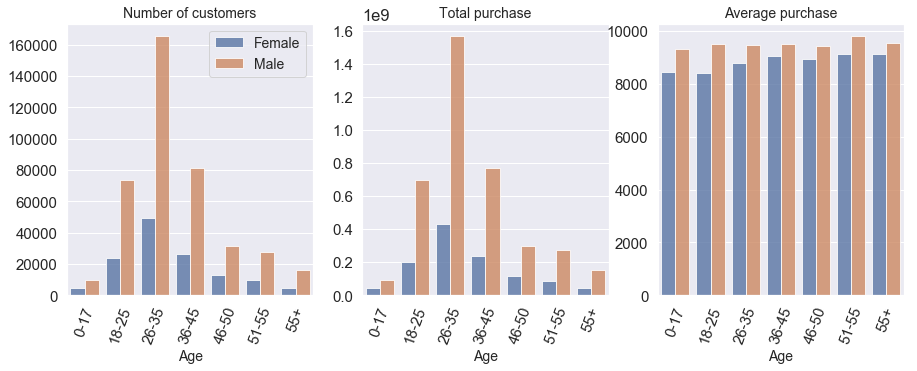

In [97]:
#    01. Count/Purchase by Age by Gender
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('Age',order=age_order,hue='Gender',data=BlackFriday,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)


plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(132)
df_Tpurchase_by_Age = BlackFriday.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
#print(df_Tpurchase_by_Age)
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)


plt.title('Total purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_Age = BlackFriday.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)


plt.title('Average purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

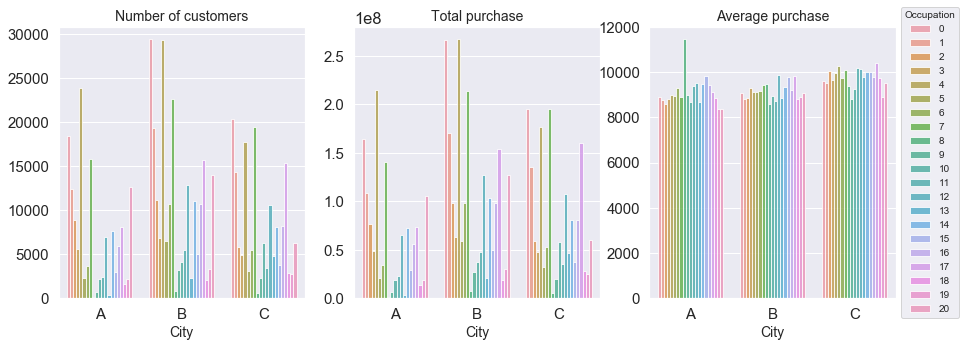

In [98]:
#    02. Count/Purchase by City by Occupation

city_order = ['A','B','C']
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('City_Category',order=city_order,hue='Occupation',data=BlackFriday,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)


plt.title('Number of customers',fontsize=14)
plt.subplot(132)
df_Tpurchase_by_City = BlackFriday.groupby(['City_Category','Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Tpurchase_by_City,alpha = 0.8)


plt.title('Total purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_City = BlackFriday.groupby(['City_Category','Occupation']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Apurchase_by_City,alpha = 0.8)


plt.title('Average purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=15)

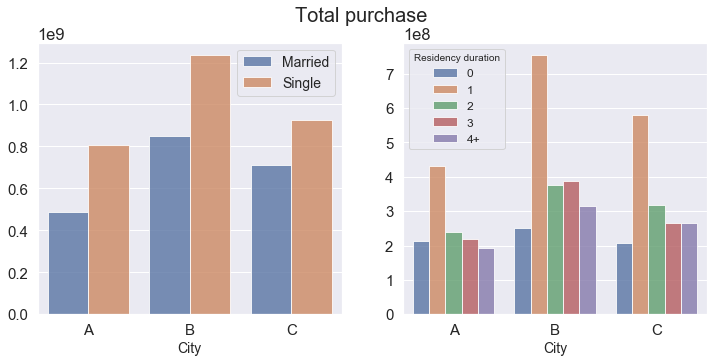

In [99]:
#    03. Purchase by City by Marrital status and Residency duration

BlackFriday['Marital_Status_label']=np.where(BlackFriday['Marital_Status'] == 0,'Single','Married')
df_Tpurchase_by_City_Marital = BlackFriday.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = BlackFriday.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))

fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')

plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)

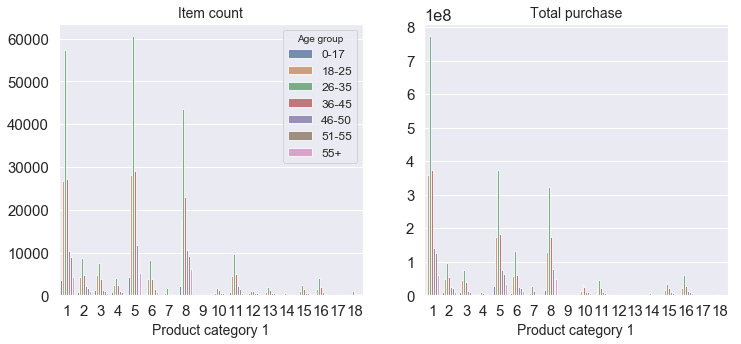

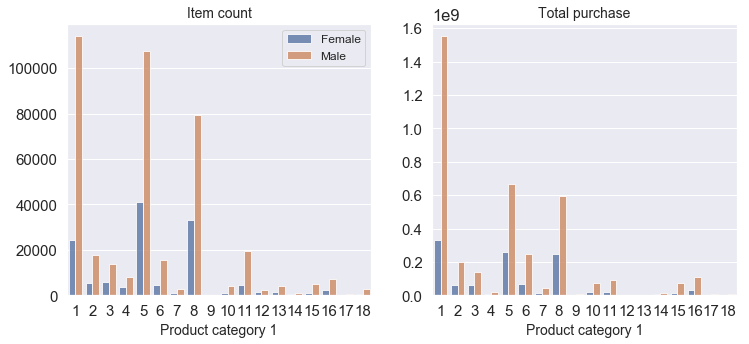

In [100]:
#    04. Count/Purchase by Product_Category_1 by Age and Gender

df_Tpurchase_by_PC1_Age = BlackFriday.groupby(['Product_Category_1','Age']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Age',data=BlackFriday,alpha = 0.8,hue_order=age_order)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Age',data=df_Tpurchase_by_PC1_Age,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

df_Tpurchase_by_PC1_Gender = BlackFriday.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Gender',data=BlackFriday,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_Tpurchase_by_PC1_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

Dummy Variable

In [101]:
# 05. general correlation between different features

le_U_ID = LabelEncoder()
BlackFriday['User_ID'] = le_U_ID.fit_transform(BlackFriday['User_ID'])
le_P_ID = LabelEncoder()
BlackFriday['Product_ID'] = le_P_ID.fit_transform(BlackFriday['Product_ID'])
BlackFriday['Gender'] = np.where(BlackFriday['Gender']=='F',1,0) # Male: 0, Female: 1
Age_map = {'0-17':0,'26-35':1, '46-50':2, '36-45':3, '18-25':4,'51-55':5,'55+':6}
BlackFriday['Age'] = BlackFriday['Age'].map(Age_map)
City_map = {'A':0,'B':1,'C':2}
BlackFriday['City_Category'] = BlackFriday['City_Category'].map(City_map)
BlackFriday['Stay_In_Current_City_Years'] = np.where(BlackFriday['Stay_In_Current_City_Years']=='4+','4',BlackFriday['Stay_In_Current_City_Years'])
BlackFriday['Stay_In_Current_City_Years'] = BlackFriday['Stay_In_Current_City_Years'].astype(int)
BlackFriday['Marital_Status_label'] = np.where(BlackFriday['Marital_Status_label']=='Married',1,0) # Married: 1, Single: 0

Correlation Between the Variables

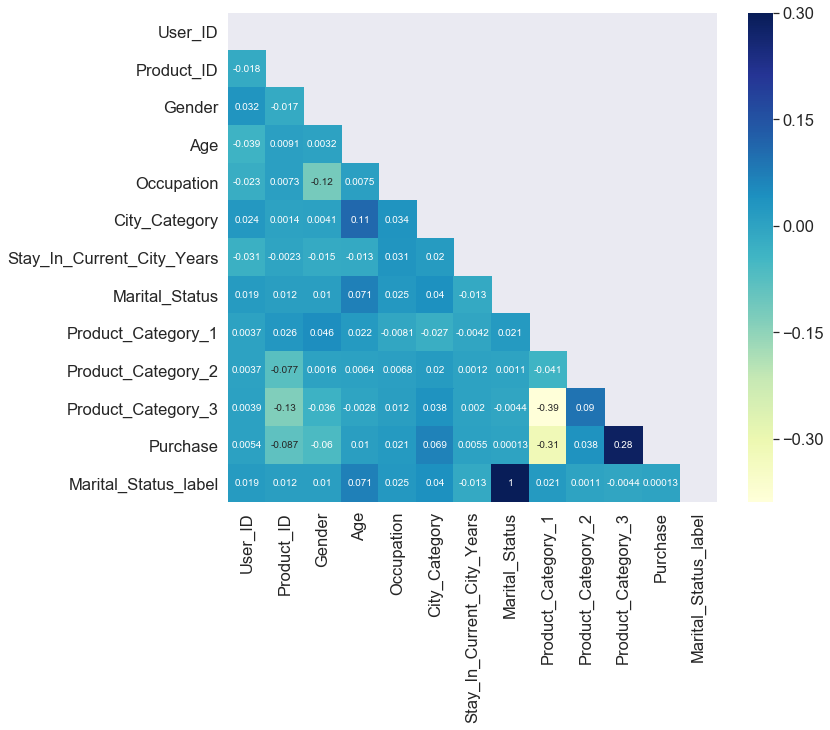

In [102]:
mask = np.zeros_like(BlackFriday.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11, 9))
ax = sns.heatmap(BlackFriday.corr(), mask=mask, square = True, vmax = 0.3,annot=True,cmap="YlGnBu")
sns.set(font_scale = 1.5)

In [103]:
# Co-rrelation of all attributes with Purcahse.
corr_matrix = BlackFriday.corr()

corr_matrix["Purchase"].sort_values(ascending=False)

Purchase                      1.000000
Product_Category_3            0.284120
City_Category                 0.068507
Product_Category_2            0.038395
Occupation                    0.021104
Age                           0.010417
Stay_In_Current_City_Years    0.005470
User_ID                       0.005406
Marital_Status_label          0.000129
Marital_Status                0.000129
Gender                       -0.060086
Product_ID                   -0.086541
Product_Category_1           -0.314125
Name: Purchase, dtype: float64

The variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables.

In [104]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(BlackFriday.values, i) for i in range(BlackFriday.shape[1])]
vif["features"] = BlackFriday.columns
vif.round(1)

,VIF Factor,features
0,3.500000,User_ID
1,3.300000,Product_ID
2,1.300000,Gender
3,3.300000,Age
4,2.400000,Occupation
5,2.800000,City_Category
6,2.800000,Stay_In_Current_City_Years
7,inf,Marital_Status
8,3.000000,Product_Category_1
9,2.100000,Product_Category_2


visualize the relation between the predictor and response using scatter plot in Python ( linear relationship ) 

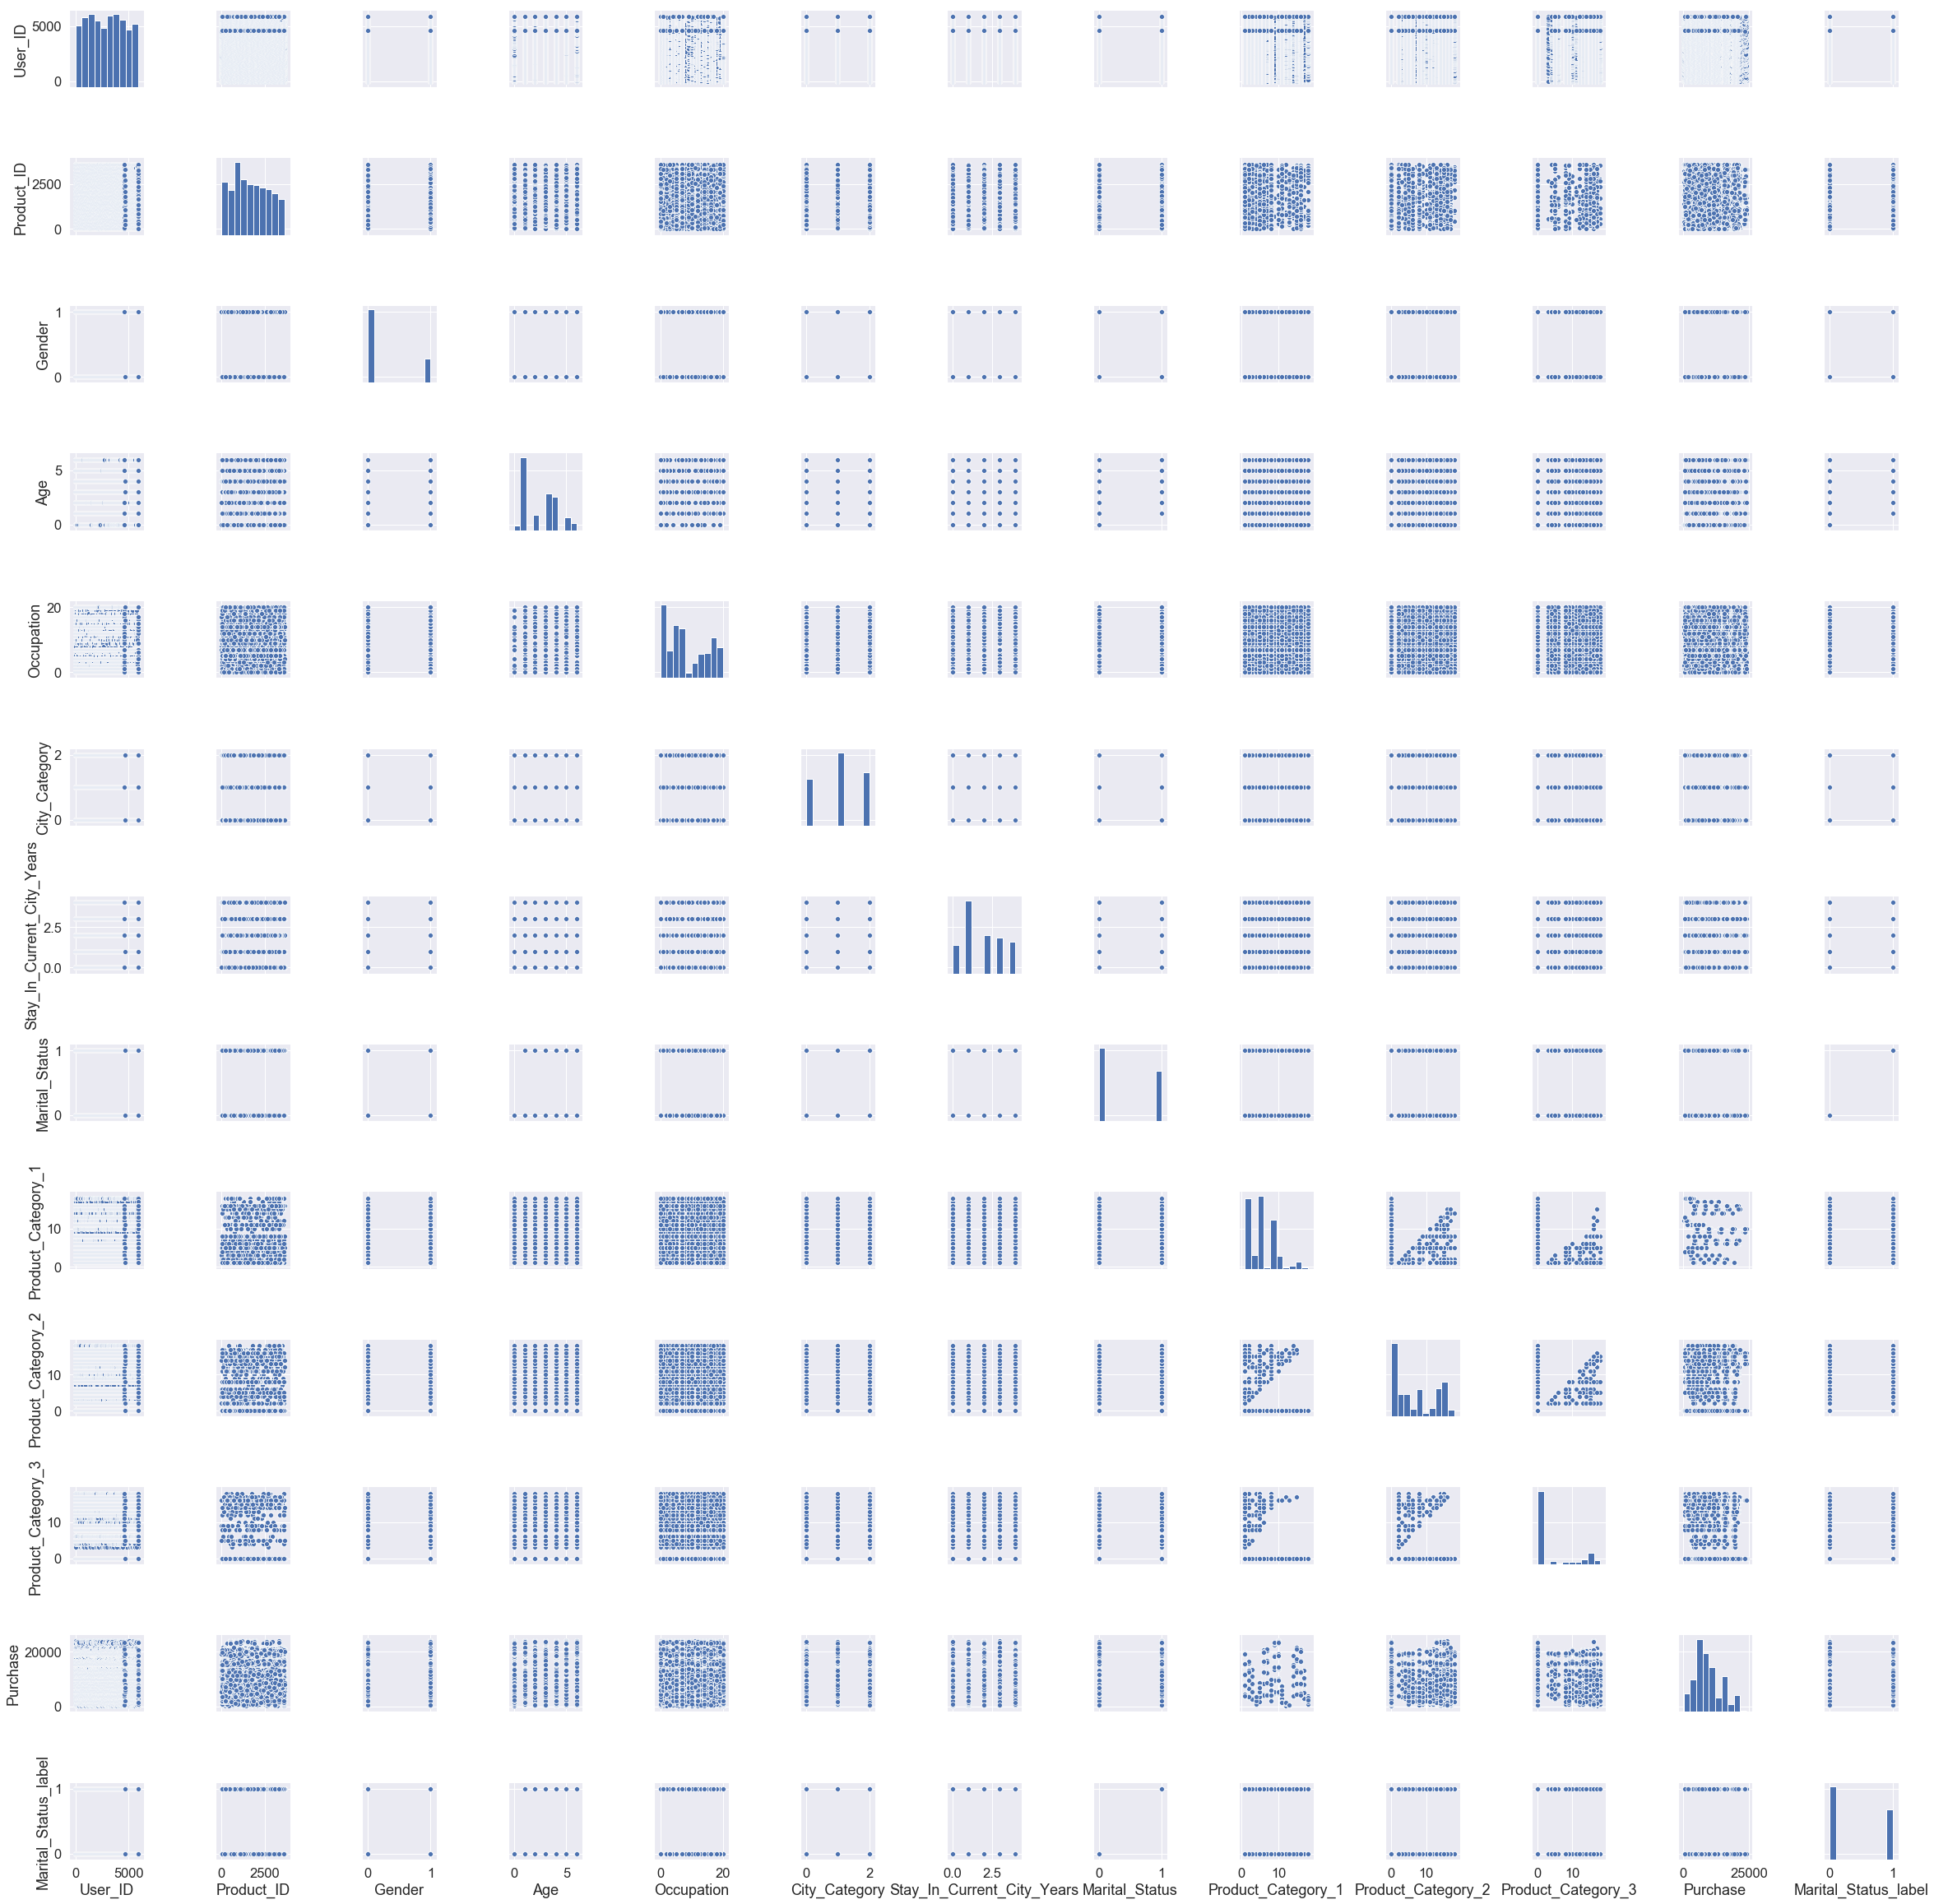

In [38]:
sns.pairplot(BlackFriday)

Linear Regression Model Selection

Model 1 - Purchase ~ All other variables

Calculate R2, AIC, Test/Train Error, KFold ( CrossValidation), QQPlot ( multivariate )

In [17]:
# create a fitted model
lm1 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Marital_Status+Gender+Product_ID+Product_Category_1', data=BlackFriday).fit()

# print the coefficients
lm1.params

Intercept                     10439.396950
Product_Category_3              142.403943
City_Category                   350.284253
Product_Category_2                5.562752
Occupation                        7.963400
Age                              34.354123
Stay_In_Current_City_Years        8.768056
User_ID                           0.015776
Marital_Status                   37.526315
Gender                         -496.628869
Product_ID                       -0.283534
Product_Category_1             -318.030101
dtype: float64

In [18]:
# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     7820.
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        03:37:52   Log-Likelihood:            -5.2995e+06
No. Observations:              537577   AIC:                         1.060e+07
Df Residuals:                  537565   BIC:                         1.060e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.044e+04     28.627    364.667      0.000    1.04e+04    1.05e+04
Product_Category_3           142.4039      1.106    128.749      0.000     140.236     144.572
City_Category                350.2843      8.378     41.808      0.000     333.863     366.705
Product_Category_2             5.5628      1.022      5.443      0.000       3.560       7.566
Occupation                     7.9634      0.975      8.167      0.000       6.052       9.875
Age                           34.3541      4.060      8.462      0.000      26.397      42.311
Stay_In_Current_City_Years     8.7681      4.897      1.790      0.073      -0.830      18.367
User_ID                        0.0158      0.004      4.171      0.000       0.008       0.023
Marital_Status                37.5263     12.881      2.913      0.004      12.279      62.774
Gender                      -496.6289     14.779    -33.604      0.000    -525.595    -467.662
Product_ID                    -0.2835      0.006    -44.535      0.000      -0.296      -0.271
Product_Category_1          -318.0301      1.828   -173.931      0.000    -321.614    -314.446
==============================================================================
Omnibus:                    50545.942   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67579.721
Skew:                           0.793   Prob(JB):                         0.00
Kurtosis:                       3.709   Cond. No.                     1.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Step 1 :
df_frac = BlackFriday.sample(frac=0.001)
X_m1= df_frac[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status','Gender','Product_ID','Product_Category_1']] 
y_m1 = df_frac['Purchase']

# Split data
X_m1_train,X_m1_test,y_m1_train,y_m1_test = train_test_split(X_m1,y_m1,test_size=0.5, random_state=0)

# Instantiate model
lm_1= LinearRegression(fit_intercept=True)

# Fit model
lm_1.fit(X_m1_train,y_m1_train)

# Predict
y_pred_test_m1 = lm_1.predict(X_m1_test)
y_pred_train_m1 = lm_1.predict(X_m1_train)
y_pred_m1 = y_pred_test_m1

In [113]:
#residual = df_frac['Purchase'].values - lm1.predict(X_m1)
#plt.scatter(residual.values,residual.index)
#plt.xlabel("Predictors")
#plt.ylabel("residual")
#plt.show()

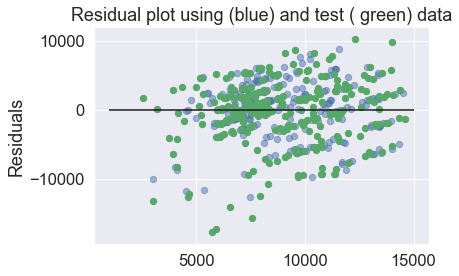

In [114]:
Residual_Graph(y_pred_train_m1,y_pred_test_m1,y_m1_train,y_m1_test,1000,15000)

In [20]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_m1.columns, lm_1.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,Product_Category_3,234.506123
1,City_Category,227.641175
2,Product_Category_2,34.664666
3,Occupation,13.357493
4,Age,35.257457
5,Stay_In_Current_City_Years,-303.523191
6,User_ID,0.053453
7,Marital_Status,22.137796
8,Gender,-885.355820
9,Product_ID,-0.059415


In [21]:
# Estimated intercept co-efficient : B0
lm_1.intercept_

9815.253132345832

In [22]:
#Comparing Traning and Test Error.
train_error, test_error = calc_metrics(y_pred_train_m1, y_m1_train, y_pred_test_m1, y_m1_test)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 3895.663 | test error: 4713.638
train/test: 1.2


In [84]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

model_1 = skl_lm.LinearRegression()
x_vars=BlackFriday[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status','Gender','Product_ID','Product_Category_1']]
y_vars=BlackFriday['Purchase']
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)

#for i in range(1,11):
poly = PolynomialFeatures(degree=1)
X_current = poly.fit_transform(x_vars)
model_1 = model_1.fit(X_current, y_vars)
scores = cross_val_score(model_1, X_current, y_vars, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    
print("Degree-"+str(1)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 21389278.846511763, STD: 68842.45510066608


In [24]:
clf = linear_model.Lasso()
clf.fit(X_m1_train,y_m1_train)
accuracy = clf.score(X_m1_test,y_m1_test)
print(accuracy)

0.12685841354040794


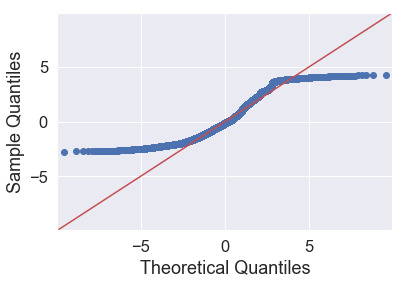

In [28]:
QQPlot(lm1)

Model 2 - Purchase ~ All other variables of Positive co-relation with Purchase
-> Cal R2 , AIC 
-> Test/Train Error
-> KFold ( CrossValidation) 
-> QQPlot ( multivariate )

In [29]:
# create a fitted model
lm2 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Marital_Status', data=BlackFriday).fit()

# print the coefficients
lm2.params

Intercept                     7834.759324
Product_Category_3             223.153376
City_Category                  370.496005
Product_Category_2               9.456048
Occupation                      12.019775
Age                             15.972029
Stay_In_Current_City_Years      13.255104
User_ID                          0.010686
Marital_Status                 -17.206568
dtype: float64

In [30]:
# print a summary of the fitted model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     6202.
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        03:39:42   Log-Likelihood:            -5.3157e+06
No. Observations:              537577   AIC:                         1.063e+07
Df Residuals:                  537568   BIC:                         1.063e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   7834.7593     23.816    328.964      0.000    7788.080    7881.439
Product_Category_3           223.1534      1.042    214.071      0.000     221.110     225.197
City_Category                370.4960      8.632     42.920      0.000     353.577     387.415
Product_Category_2             9.4560      1.051      8.998      0.000       7.396      11.516
Occupation                    12.0198      0.998     12.044      0.000      10.064      13.976
Age                           15.9720      4.182      3.819      0.000       7.775      24.170
Stay_In_Current_City_Years    13.2551      5.046      2.627      0.009       3.364      23.146
User_ID                        0.0107      0.004      2.744      0.006       0.003       0.018
Marital_Status               -17.2066     13.270     -1.297      0.195     -43.216       8.803
==============================================================================
Omnibus:                    26412.165   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30530.953
Skew:                           0.583   Prob(JB):                         0.00
Kurtosis:                       3.041   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Step 1 :
df_frac = BlackFriday.sample(frac=0.001)
X_m2= df_frac[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status']] 
y_m2 = df_frac['Purchase']

# Split data
X_m2_train,X_m2_test,y_m2_train,y_m2_test = train_test_split(X_m2,y_m2,test_size=0.5, random_state=0)

# Instantiate model
lm_2= LinearRegression(fit_intercept=True)

# Fit model
lm_2.fit(X_m2_train,y_m2_train)

# Predict
y_pred_test_m2 = lm_2.predict(X_m2_test)
y_pred_train_m2 = lm_2.predict(X_m2_train)
y_pred_m2 = y_pred_test_m2

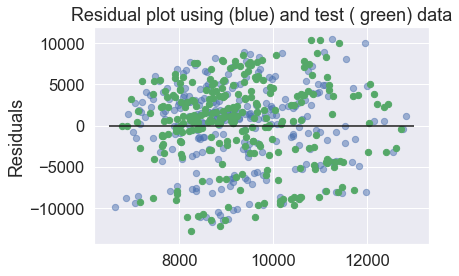

In [117]:
Residual_Graph(y_pred_train_m2,y_pred_test_m2,y_m2_train,y_m2_test,6500,13000)

In [32]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_m2.columns, lm_2.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,Product_Category_3,148.252929
1,City_Category,408.787854
2,Product_Category_2,0.396001
3,Occupation,-10.937513
4,Age,309.958302
5,Stay_In_Current_City_Years,91.763051
6,User_ID,-0.277295
7,Marital_Status,306.627892


In [33]:
# Estimated intercept co-efficient : B0
lm_2.intercept_

8082.864592084054

In [34]:
#Comparing Traning and Test Error.
train_error, test_error = calc_metrics(y_pred_train_m2, y_m2_train, y_pred_test_m2, y_m2_test)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 4815.813 | test error: 5009.24
train/test: 1.0


In [85]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

model_2 = skl_lm.LinearRegression()
x_vars=BlackFriday[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status']]
y_vars=BlackFriday['Purchase']
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)

#for i in range(1,11):
poly = PolynomialFeatures(degree=1)
X_current = poly.fit_transform(x_vars)
model_2 = model_2.fit(X_current, y_vars)
scores = cross_val_score(model_2, X_current, y_vars, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    
print("Degree-"+str(1)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 22715015.684316803, STD: 59069.514876022935


In [36]:
#cross_validation Accuracy
clf = linear_model.Lasso()
clf.fit(X_m2_train,y_m2_train)
accuracy = clf.score(X_m2_test,y_m2_test)
print(accuracy)

0.0700700406446344


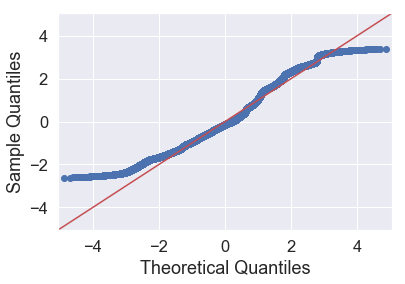

In [37]:
QQPlot(lm2)

Model 3 - Purchase ~ All other variables of Positive co-relation with Purchase ( Remove the Intercept)
-> Cal R2 , AIC 
-> Test/Train Error
-> KFold ( CrossValidation) 
-> QQPlot ( multivariate )

In [38]:
# create a fitted model
lm3 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Marital_Status - 1', data=BlackFriday).fit()

# print the coefficients
lm3.params

Product_Category_3             267.065383
City_Category                 1160.431207
Product_Category_2             103.685659
Occupation                     115.887735
Age                            571.925334
Stay_In_Current_City_Years     676.900240
User_ID                          0.649067
Marital_Status                 743.647999
dtype: float64

In [39]:
# print a summary of the fitted model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.084e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        03:40:23   Log-Likelihood:            -5.3650e+06
No. Observations:              537577   AIC:                         1.073e+07
Df Residuals:                  537569   BIC:                         1.073e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Product_Category_3           267.0654      1.133    235.686      0.000     264.844     269.286
City_Category               1160.4312      9.088    127.689      0.000    1142.619    1178.243
Product_Category_2           103.6857      1.108     93.558      0.000     101.514     105.858
Occupation                   115.8877      1.038    111.681      0.000     113.854     117.922
Age                          571.9253      4.193    136.391      0.000     563.707     580.144
Stay_In_Current_City_Years   676.9002      5.070    133.513      0.000     666.963     686.837
User_ID                        0.6491      0.004    175.352      0.000       0.642       0.656
Marital_Status               743.6480     14.322     51.922      0.000     715.577     771.719
==============================================================================
Omnibus:                    11836.251   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12631.314
Skew:                           0.372   Prob(JB):                         0.00
Kurtosis:                       3.098   Cond. No.                     6.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Step 1 :
df_frac = BlackFriday.sample(frac=0.001)
X_m3= df_frac[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status']] 
y_m3 = df_frac['Purchase']

# Split data
X_m3_train,X_m3_test,y_m3_train,y_m3_test = train_test_split(X_m3,y_m3,test_size=0.5, random_state=0)

# Instantiate model
lm_3= LinearRegression(fit_intercept=False)

# Fit model
lm_3.fit(X_m3_train,y_m3_train)

# Predict
y_pred_test_m3 = lm_3.predict(X_m3_test)
y_pred_train_m3 = lm_3.predict(X_m3_train)
y_pred_m3 = y_pred_test_m3

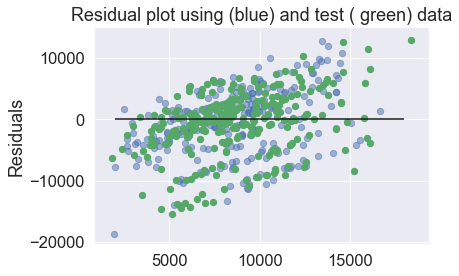

In [120]:
Residual_Graph(y_pred_train_m3,y_pred_test_m3,y_m3_train,y_m3_test,2000,18000)

In [43]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_m3.columns, lm_3.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,Product_Category_3,287.363201
1,City_Category,1143.029910
2,Product_Category_2,107.810931
3,Occupation,110.571042
4,Age,588.974497
5,Stay_In_Current_City_Years,866.224077
6,User_ID,0.418596
7,Marital_Status,848.334056


In [44]:
# Estimated intercept co-efficient : B0
lm_3.intercept_

0.0

In [45]:
#Comparing Traning and Test Error.
train_error, test_error = calc_metrics(y_pred_train_m3, y_m3_train, y_pred_test_m3, y_m3_test)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 5204.743 | test error: 5350.433
train/test: 1.0


In [46]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

model = skl_lm.LinearRegression(fit_intercept=False)
x_vars=BlackFriday[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status']]
y_vars=BlackFriday['Purchase']
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)

#for i in range(1,11):
poly = PolynomialFeatures(degree=1)
X_current = poly.fit_transform(x_vars)
model_3 = model.fit(X_current, y_vars)
scores = cross_val_score(model_3, X_current, y_vars, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    
print("Degree-"+str(1)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 22715015.684316806, STD: 59069.514876017005


In [47]:
#cross_validation Accuracy
clf = linear_model.Lasso()
clf.fit(X_m3_train,y_m3_train)
accuracy = clf.score(X_m3_test,y_m3_test)
print(accuracy)

0.07571978330821671


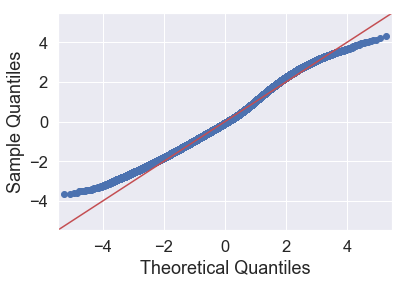

In [48]:
QQPlot(lm3)

Model 4 : Purchase ~ All Other Variables ( Remove the Intercept ) 

-> Cal R2 , AIC 
-> Test/Train Error
-> KFold ( CrossValidation) 
-> QQPlot ( multivariate )

In [49]:
# create a fitted model
lm4 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Marital_Status+Gender+Product_ID+Product_Category_1 - 1', data=BlackFriday).fit()

# print the coefficients
lm4.params

Product_Category_3             263.502007
City_Category                 1045.075586
Product_Category_2              98.386017
Occupation                     103.377119
Age                            498.285166
Stay_In_Current_City_Years     591.674408
User_ID                          0.570709
Marital_Status                 632.799538
Gender                         280.999899
Product_ID                       0.696473
Product_Category_1             -53.971090
dtype: float64

In [50]:
# print a summary of the fitted model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 1.562e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        03:42:05   Log-Likelihood:            -5.3589e+06
No. Observations:              537577   AIC:                         1.072e+07
Df Residuals:                  537566   BIC:                         1.072e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Product_Category_3           263.5020      1.178    223.625      0.000     261.193     265.811
City_Category               1045.0756      9.112    114.689      0.000    1027.216    1062.935
Product_Category_2            98.3860      1.106     88.994      0.000      96.219     100.553
Occupation                   103.3771      1.049     98.538      0.000     101.321     105.433
Age                          498.2852      4.306    115.721      0.000     489.846     506.725
Stay_In_Current_City_Years   591.6744      5.170    114.443      0.000     581.541     601.808
User_ID                        0.5707      0.004    147.598      0.000       0.563       0.578
Marital_Status               632.7995     14.271     44.342      0.000     604.829     660.770
Gender                       280.9999     16.333     17.204      0.000     248.987     313.013
Product_ID                     0.6965      0.006    108.048      0.000       0.684       0.709
Product_Category_1           -53.9711      1.875    -28.782      0.000     -57.646     -50.296
==============================================================================
Omnibus:                    15862.221   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17309.232
Skew:                           0.432   Prob(JB):                         0.00
Kurtosis:                       3.166   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Step 1 :
df_frac = BlackFriday.sample(frac=0.001)
X_m4= df_frac[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status','Gender','Product_ID','Product_Category_1']] 
y_m4 = df_frac['Purchase']

# Split data
X_m4_train,X_m4_test,y_m4_train,y_m4_test = train_test_split(X_m4,y_m4,test_size=0.5, random_state=0)

# Instantiate model
lm_4= LinearRegression(fit_intercept=False)
#lm_4 = ols("y_m4_train ~ X_m4_train - 1", BlackFriday).fit()
#print(model.summary()) 

# Fit model
lm_4.fit(X_m4_train,y_m4_train)

# Predict
y_pred_test_m4 = lm_4.predict(X_m4_test)
y_pred_train_m4 = lm_4.predict(X_m4_train)
y_pred_m4 = y_pred_test_m4

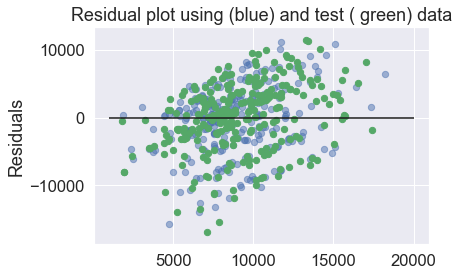

In [123]:
Residual_Graph(y_pred_train_m4,y_pred_test_m4,y_m4_train,y_m4_test,1000,20000)

In [52]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_m4.columns, lm_4.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,Product_Category_3,242.950135
1,City_Category,580.200054
2,Product_Category_2,60.496530
3,Occupation,85.436166
4,Age,822.211501
5,Stay_In_Current_City_Years,486.013379
6,User_ID,0.833317
7,Marital_Status,218.946766
8,Gender,1052.799147
9,Product_ID,0.640034


In [53]:
# Estimated intercept co-efficient : B0
lm_4.intercept_

0.0

In [54]:
#Comparing Traning and Test Error.
train_error, test_error = calc_metrics(y_pred_train_m4, y_m4_train, y_pred_test_m4, y_m4_test)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 4927.298 | test error: 5156.498
train/test: 1.0


In [66]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

model_4 = skl_lm.LinearRegression(fit_intercept=False)
x_vars=BlackFriday[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status','Gender','Product_ID','Product_Category_1']]
y_vars=BlackFriday['Purchase']
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)

#for i in range(1,11):
poly = PolynomialFeatures(degree=1)
X_current = poly.fit_transform(x_vars)
model_4 = model_4.fit(X_current, y_vars)
scores = cross_val_score(model_4, X_current, y_vars, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    
print("Degree-"+str(1)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 21389278.846511763, STD: 68842.45510066343


In [56]:
#cross_validation Accuracy
clf = linear_model.Lasso()
clf.fit(X_m4_train,y_m4_train)
accuracy = clf.score(X_m4_test,y_m4_test)
print(accuracy)

0.1411705137248409


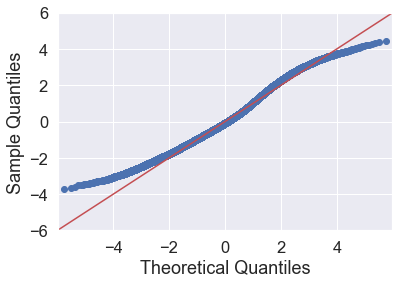

In [57]:
QQPlot(lm4)

Model 5 Purchase ~ All other variables with Positive Co-relation + Age * Gender ( Remove the Intercept and High VIF column ) 

-> Cal R2 , AIC 
-> Test/Train Error
-> KFold ( CrossValidation) 
-> QQPlot ( multivariate )

In [58]:
# create a fitted model
lm5 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Gender+Product_ID+Product_Category_1 + (Age * Gender) - 1', data=BlackFriday).fit()

# print the coefficients
lm5.params

Product_Category_3             261.038760
City_Category                 1050.599386
Product_Category_2              96.406006
Occupation                     101.925935
Age                            669.527678
Stay_In_Current_City_Years     573.091654
User_ID                          0.560653
Gender                        1975.050487
Product_ID                       0.676723
Product_Category_1             -58.497626
Age:Gender                    -687.228302
dtype: float64

In [59]:
# print a summary of the fitted model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 1.571e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        03:42:49   Log-Likelihood:            -5.3576e+06
No. Observations:              537577   AIC:                         1.072e+07
Df Residuals:                  537566   BIC:                         1.072e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Product_Category_3           261.0388      1.176    221.878      0.000     258.733     263.345
City_Category               1050.5994      9.077    115.738      0.000    1032.808    1068.391
Product_Category_2            96.4060      1.104     87.357      0.000      94.243      98.569
Occupation                   101.9259      1.047     97.390      0.000      99.875     103.977
Age                          669.5277      4.811    139.172      0.000     660.099     678.957
Stay_In_Current_City_Years   573.0917      5.169    110.865      0.000     562.960     583.223
User_ID                        0.5607      0.004    145.199      0.000       0.553       0.568
Gender                      1975.0505     29.667     66.574      0.000    1916.904    2033.197
Product_ID                     0.6767      0.006    105.054      0.000       0.664       0.689
Product_Category_1           -58.4976      1.872    -31.245      0.000     -62.167     -54.828
Age:Gender                  -687.2283     10.191    -67.432      0.000    -707.203    -667.253
==============================================================================
Omnibus:                    16402.592   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17953.969
Skew:                           0.439   Prob(JB):                         0.00
Kurtosis:                       3.176   Cond. No.                     1.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Step 1 :
df_frac = BlackFriday.sample(frac=0.001)
X_m5= df_frac[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status','Gender','Product_ID','Product_Category_1']] 
y_m5 = df_frac['Purchase']

# Split data
X_m5_train,X_m5_test,y_m5_train,y_m5_test = train_test_split(X_m5,y_m5,test_size=0.5, random_state=0)

# Instantiate model
lm_5= LinearRegression(fit_intercept=False)
#lm_4 = ols("y_m4_train ~ X_m4_train - 1", BlackFriday).fit()
lm5 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Gender+Product_ID+Product_Category_1 + (Age * Gender) - 1', data=BlackFriday).fit()


# Fit model
lm_5.fit(X_m5_train,y_m5_train)

# Predict
y_pred_test_m5 = lm_5.predict(X_m5_test)
y_pred_train_m5 = lm_5.predict(X_m5_train)
y_pred_m5 = y_pred_test_m5

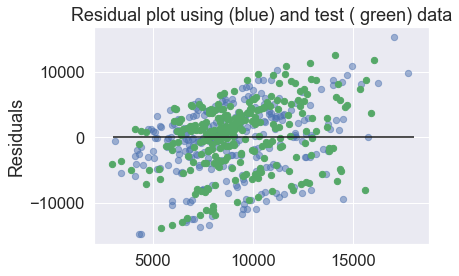

In [125]:
Residual_Graph(y_pred_train_m5,y_pred_test_m5,y_m5_train,y_m5_test,3000,18000)

In [61]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_m5.columns, lm_5.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,Product_Category_3,294.507533
1,City_Category,660.556552
2,Product_Category_2,94.758908
3,Occupation,103.025863
4,Age,464.165963
5,Stay_In_Current_City_Years,672.959650
6,User_ID,0.456872
7,Marital_Status,-205.884201
8,Gender,-609.136213
9,Product_ID,0.700168


In [62]:
# Estimated intercept co-efficient : B0
lm_5.intercept_

0.0

In [63]:
#Comparing Traning and Test Error.
train_error, test_error = calc_metrics(y_pred_train_m5, y_m5_train, y_pred_test_m5, y_m5_test)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 5388.588 | test error: 5016.4
train/test: 0.9


In [69]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

model_5 = skl_lm.LinearRegression(fit_intercept=False)
#model = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Gender+Product_ID+Product_Category_1 + (Age * Gender) - 1', data=BlackFriday).fit()


x_vars=BlackFriday[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status','Gender','Product_ID','Product_Category_1']]
y_vars=BlackFriday['Purchase']
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)

#for i in range(1,11):
poly = PolynomialFeatures(degree=1)
X_current = poly.fit_transform(x_vars)
model_5 = model_5.fit(X_current, y_vars)
scores = cross_val_score(model_5, X_current, y_vars, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    
print("Degree-"+str(1)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 21389278.846511763, STD: 68842.45510066343


In [70]:
#cross_validation Accuracy
clf = linear_model.Lasso()
clf.fit(X_m5_train,y_m5_train)
accuracy = clf.score(X_m5_test,y_m5_test)
print(accuracy)

0.07923789682700333


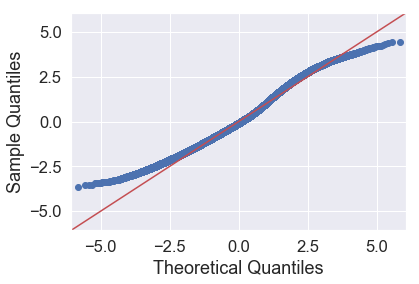

In [71]:
QQPlot(lm5)

Model 6 : Remove High VIF values from the Model.

In [72]:
# create a fitted model
#lm6 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Marital_Status+Gender+Product_ID+Product_Category_1 + (Age * Gender) + (City_Category*Occupation) + (Age * Occupation) + ( Age * City_Category ) + ( Age * Marital_Status) - 1', data=BlackFriday).fit()
lm6 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Gender+Product_ID+Product_Category_1 + (Age * Gender) + (City_Category*Occupation) + (Age * Occupation) + ( Age * City_Category ) - 1', data=BlackFriday).fit()

# print the coefficients
lm6.params

Product_Category_3             220.709350
City_Category                 2911.136976
Product_Category_2              65.891531
Occupation                     310.055122
Age                           1625.510340
Stay_In_Current_City_Years     375.961379
User_ID                          0.386251
Gender                        1479.461024
Product_ID                       0.350661
Product_Category_1            -144.460234
Age:Gender                    -582.756335
City_Category:Occupation       -87.931000
Age:Occupation                 -61.427132
Age:City_Category             -563.572752
dtype: float64

In [73]:
# print a summary of the fitted model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 1.346e+05
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        03:46:46   Log-Likelihood:            -5.3397e+06
No. Observations:              537577   AIC:                         1.068e+07
Df Residuals:                  537563   BIC:                         1.068e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Product_Category_3           220.7094      1.157    190.759      0.000     218.442     222.977
City_Category               2911.1370     17.525    166.114      0.000    2876.789    2945.485
Product_Category_2            65.8915      1.079     61.063      0.000      63.777      68.006
Occupation                   310.0551      2.012    154.082      0.000     306.111     313.999
Age                         1625.5103      7.929    205.014      0.000    1609.970    1641.051
Stay_In_Current_City_Years   375.9614      5.105     73.648      0.000     365.956     385.967
User_ID                        0.3863      0.004    100.512      0.000       0.379       0.394
Gender                      1479.4610     28.911     51.172      0.000    1422.796    1536.127
Product_ID                     0.3507      0.006     54.314      0.000       0.338       0.363
Product_Category_1          -144.4602      1.865    -77.452      0.000    -148.116    -140.805
Age:Gender                  -582.7563      9.933    -58.667      0.000    -602.225    -563.288
City_Category:Occupation     -87.9310      1.337    -65.779      0.000     -90.551     -85.311
Age:Occupation               -61.4271      0.643    -95.467      0.000     -62.688     -60.166
Age:City_Category           -563.5728      5.235   -107.648      0.000    -573.834    -553.312
==============================================================================
Omnibus:                    25741.026   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29641.386
Skew:                           0.558   Prob(JB):                         0.00
Kurtosis:                       3.280   Cond. No.                     1.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# Step 1 :
df_frac = BlackFriday.sample(frac=0.001)
X_m6= df_frac[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Marital_Status','Gender','Product_ID','Product_Category_1']] 
y_m6 = df_frac['Purchase']

# Split data
X_m6_train,X_m6_test,y_m6_train,y_m6_test = train_test_split(X_m6,y_m6,test_size=0.5, random_state=0)

# Instantiate model
lm_6= LinearRegression(fit_intercept=False)
#lm_4 = ols("y_m4_train ~ X_m4_train - 1", BlackFriday).fit()
lm6 = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Gender+Product_ID+Product_Category_1 + (Age * Gender) + (City_Category*Occupation) + (Age * Occupation) + ( Age * City_Category ) - 1', data=BlackFriday).fit()


# Fit model
lm_6.fit(X_m6_train,y_m6_train)

# Predict
y_pred_test_m6 = lm_6.predict(X_m6_test)
y_pred_train_m6 = lm_6.predict(X_m6_train)
y_pred_m6 = y_pred_test_m6

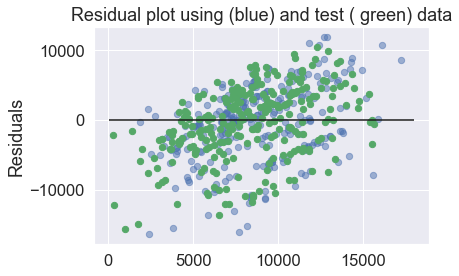

In [128]:
Residual_Graph(y_pred_train_m6,y_pred_test_m6,y_m6_train,y_m6_test,50,18000)

In [75]:
#data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(X_m6.columns, lm_6.coef_)),columns= ['features',' EstimatedCo-efficients'])

,features,EstimatedCo-efficients
0,Product_Category_3,184.773188
1,City_Category,1066.761227
2,Product_Category_2,28.871936
3,Occupation,104.732573
4,Age,981.072064
5,Stay_In_Current_City_Years,550.771542
6,User_ID,0.458119
7,Marital_Status,1800.025032
8,Gender,1345.930682
9,Product_ID,0.686688


In [76]:
# Estimated intercept co-efficient : B0
lm_6.intercept_

0.0

In [78]:
#Comparing Traning and Test Error.
train_error, test_error = calc_metrics(y_pred_train_m6, y_m6_train, y_pred_test_m6, y_m6_test)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 5409.791 | test error: 5214.1
train/test: 1.0


In [79]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

model_6 = skl_lm.LinearRegression(fit_intercept=False)
#model = ols(formula='Purchase ~ Product_Category_3+City_Category+Product_Category_2+Occupation+Age+Stay_In_Current_City_Years+User_ID+Gender+Product_ID+Product_Category_1 + (Age * Gender) - 1', data=BlackFriday).fit()


x_vars=BlackFriday[['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Gender','Product_ID','Product_Category_1']]
y_vars=BlackFriday['Purchase']
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)

#for i in range(1,11):
poly = PolynomialFeatures(degree=1)
X_current = poly.fit_transform(x_vars)
model_6 = model_6.fit(X_current, y_vars)
scores = cross_val_score(model_6, X_current, y_vars, scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    
print("Degree-"+str(1)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 21389532.811720826, STD: 68447.58729989866


In [81]:
#cross_validation Accuracy
clf = linear_model.Lasso()
clf.fit(X_m6_train,y_m6_train)
accuracy = clf.score(X_m6_test,y_m6_test)
print(accuracy)

0.04354718834243976


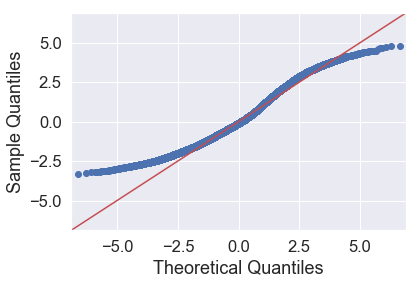

In [82]:
QQPlot(lm6)

C:\DataScience\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


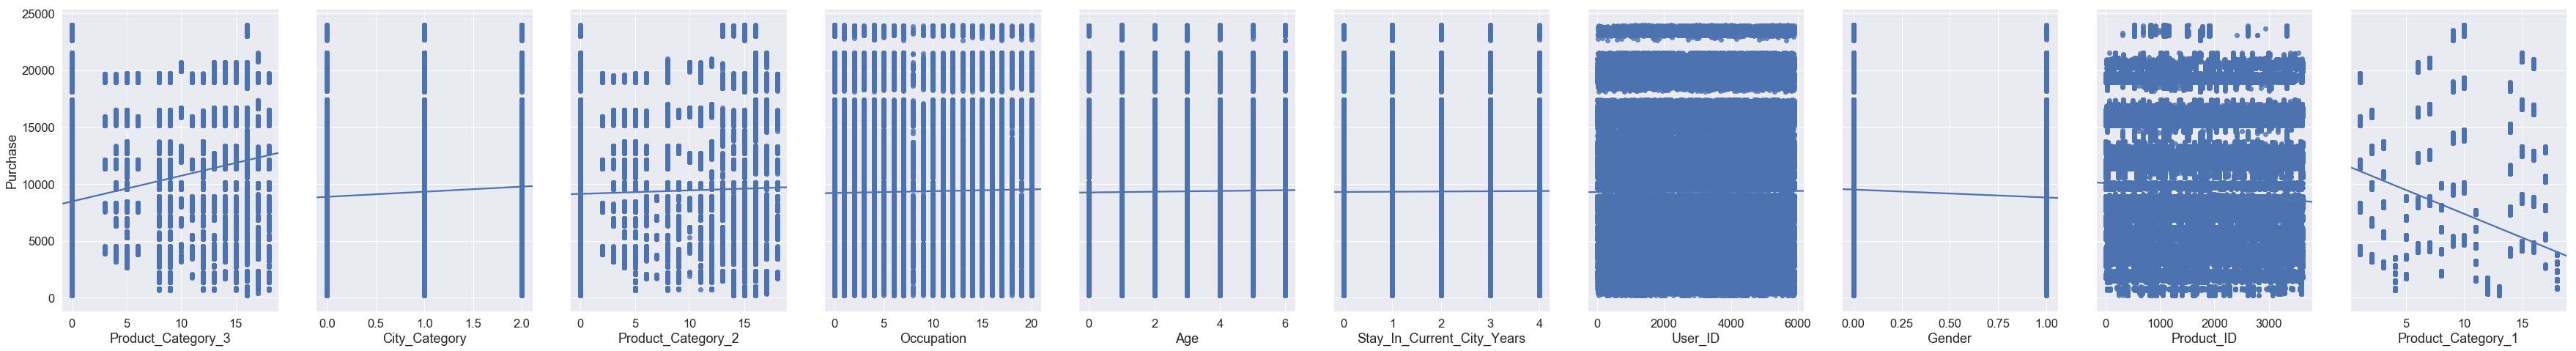

In [87]:
sns.pairplot(BlackFriday, x_vars=['Product_Category_3','City_Category','Product_Category_2','Occupation','Age','Stay_In_Current_City_Years','User_ID','Gender','Product_ID','Product_Category_1'], y_vars='Purchase', size=7, aspect=0.7, kind='reg')

Among all the above 6 Models we have tested for Linear Regression, the best fit model is the Model-6 because :

R-Squared value is Higher (0.778) than other 5 models.

AIC and BIC are lower in comparision to other Models.

Adj R-Squared is Higher than Others.


P Values ( Hypothesis Testing )
In case of our best Model ( Model-6 ) for all the attributes the P values are 0.00 . Which is good because P value should be less than 0.05.



Multiple linear regression analysis makes several key assumptions:

linear relationship : - Performed by doing visual analysis between the predictor and response relationship using scatter plot shown at top

Multivariate Normality : - Shown by QQ Plot for each fitted model.( q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution.)

No Multicollinearity : - The correlation between the variables is explained by the following points.

                       - Used scatter plot to visualize correlation effect among variables.
                       
                       - Used VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies 
                          serious multicollinearity.
                       
                       - Correlation table

Homoscedasticity : - Shown by scatter plot between Residuals and Predictors for each fitted model.

Cross-validate the model : Performed by calculating MSE and STD of CV for Kfold=5 ( For Each Fitted Model )

Compare the AIC, BIC and adujested R^2 : Calculated these values for each fitted model by using OLS.